<a href="https://colab.research.google.com/github/CrushedKatana/Machine_Learning/blob/main/UTSMachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study 2 - CC General

- This case study relates to credit card user data.
- For students with attendance numbers 2, 5, 8, 11, etc.
- Follow these steps and analyze the results.

## Data Preprocessing (20 points)

1. Load data (5 points)
2. Perform data imputation on missing data. Attach your analysis explaining why you used the chosen imputation method. (10 points)
3. Drop irrelevant features (5 points)

## Clustering - 1 (30 points)

1. Create a cluster model using KMeans with the number of clusters from 1 to 10. (10 points)
2. Create an elbow diagram, determine the best number of clusters according to the elbow method, and provide your reasoning. (10 points)
3. Calculate the silhouette coefficient value for k=1 to k=10. Based on the silhouette value, what is the best number of clusters? Is it the same as the elbow method? (10 points)

NB: You are allowed to perform normalization/standardization before building the clustering model. Observe the clustering results.

## Clustering - 2 (20 points)

1. Create a cluster model using DBSCAN. How many clusters are produced? (10 points)
2. What are the silhouette coefficient and DBI values of the clusters produced by DBSCAN? (10 points)

## Feature Selection (30 points)
After knowing the performance of the clustering results on the KMeans and DBSCAN models based on the silhouette coefficient and DBI, perform a feature selection process to improve the silhouette coefficient and DBI values. You are allowed to use an iterative process or other methods.

1. Which features provide the best silhouette coefficient/DBI values? Include the feature selection process.
2. Why did you use that feature selection method?

## BONUS - CHALLENGE (30 points)
Build an ANNOY model using the data that has gone through the data preprocessing stage. Perform a query with the 5 nearest values. Does ANNOY query the best cluster you have formed?

# ANSWER

## Data Preprocessing (20 points)



#### 1. Load data (5 points)

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [105]:
from sklearn.metrics import davies_bouldin_score
import numpy as np

# Step 4: Calculate silhouette coefficient for DBSCAN
# Silhouette score is not defined for a single cluster or no clusters
if n_clusters > 1:
    silhouette_dbscan = silhouette_score(df_scaled, dbscan.labels_)
    print(f"\nSilhouette Coefficient for DBSCAN: {silhouette_dbscan:.4f}")
else:
    print("\nSilhouette Coefficient for DBSCAN cannot be calculated as there is only one cluster or no clusters.")

# Step 5: Calculate DBI for DBSCAN
# DBI is not defined for a single cluster or no clusters
if n_clusters > 1:
    # Filter out noise points for DBI calculation
    core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_samples_mask[dbscan.core_sample_indices_] = True
    labels = dbscan.labels_[core_samples_mask]
    X = df_scaled[core_samples_mask]

    # Recalculate cluster centers for DBI
    cluster_centers = []
    unique_labels = set(labels)
    for k in unique_labels:
      if k != -1:  # Exclude noise
        class_member_mask = (labels == k)
        cluster_centers.append(X[class_member_mask].mean(axis=0))

    if len(cluster_centers) > 1:
        # Re-label clusters sequentially for DBI function
        unique_labels = set(dbscan.labels_)
        label_mapping = {label: i for i, label in enumerate(sorted(list(unique_labels)))}
        mapped_labels = np.array([label_mapping[label] for label in dbscan.labels_])

        dbi_dbscan = davies_bouldin_score(df_scaled, mapped_labels)
        print(f"Davies-Bouldin Index for DBSCAN: {dbi_dbscan:.4f}")
    else:
         print("Davies-Bouldin Index for DBSCAN cannot be calculated as there is only one cluster after filtering noise.")

else:
    print("Davies-Bouldin Index for DBSCAN cannot be calculated as there is only one cluster or no clusters.")


Silhouette Coefficient for DBSCAN: -0.1831
Davies-Bouldin Index for DBSCAN: 1.7580


In [106]:
# Step 1: Load the data

try:
    df = pd.read_csv('/content/drive/MyDrive/UTS_ML/2_CC_GENERAL.csv')
    print("Data loaded successfully.")
    display(df.head())
except FileNotFoundError:
    print("Error: The file was not found. Please check the path and filename.")

Data loaded successfully.


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### 2. Perform data imputation on missing data. Attach your analysis explaining why you used the chosen imputation method. (10 points)

In [107]:
# Check for missing values
print("\nMissing values before imputation:")
print(df.isnull().sum())

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
        print(f"Imputed missing values in '{col}' with the median ({median_val}).")

for col in df.select_dtypes(include=['object']).columns:
     if df[col].isnull().any():
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
        print(f"Imputed missing values in '{col}' with the mode ({mode_val}).")


print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values before imputation:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64
Imputed missing values in 'CREDIT_LIMIT' with the median (3000.0).
Imputed missing values in 'MINIMUM_PAYMENTS' with the median (312.343947).

Missing values after imputation:
CUST_ID                             0
BALANCE           

**Analysis of Imputation Method:**

Missing values were found in the 'CREDIT_LIMIT' and 'MINIMUM_PAYMENTS' columns. For both of these numerical columns, median imputation was used to fill the missing values.

**Why median imputation was chosen:**

Median imputation is often a good choice for numerical data when there might be outliers present. Unlike the mean, the median is not affected by extreme values, making it a more robust measure of central tendency in such cases. By using the median, we are replacing missing values with a typical value from the distribution that is less likely to be skewed by outliers, thus preserving the general distribution of the data in those columns. This can help to prevent the imputed values from disproportionately influencing subsequent analysis or model training.

#### 3. Drop irrelevant features (5 points)

In [108]:
# Step 3: Drop irrelevant features

if 'CUST_ID' in df.columns:
    df.drop('CUST_ID', axis=1, inplace=True)
    print("\nDropped 'CUST_ID' column.")

print("\nColumns after dropping irrelevant features:")
print(df.columns)

print("\nPreprocessed data:")
display(df.head())


Dropped 'CUST_ID' column.

Columns after dropping irrelevant features:
Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

Preprocessed data:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Clustering - 1 (30 points)

1. Create a cluster model using KMeans with the number of clusters from 1 to 10. (10 points)
2. Create an elbow diagram, determine the best number of clusters according to the elbow method, and provide your reasoning. (10 points)
3. Calculate the silhouette coefficient value for k=1 to k=10. Based on the silhouette value, what is the best number of clusters? Is it the same as the elbow method? (10 points)

NB: You are allowed to perform normalization/standardization before building the clustering model. Observe the clustering results.

### Clustering - 1 (30 points)


1. Create a cluster model using KMeans with the number of clusters from 1 to 10. (10 points)


In [109]:
# Step 1: Create KMeans models for k from 1 to 10

inertia = []
silhouette_scores = {}
kmeans_models = {}

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
    kmeans_models[k] = kmeans

    if k > 1:
        silhouette_avg = silhouette_score(df, kmeans.labels_)
        silhouette_scores[k] = silhouette_avg

print("KMeans models created for k from 1 to 10.")

KMeans models created for k from 1 to 10.


2. Create an elbow diagram, determine the best number of clusters according to the elbow method, and provide your reasoning. (10 points)


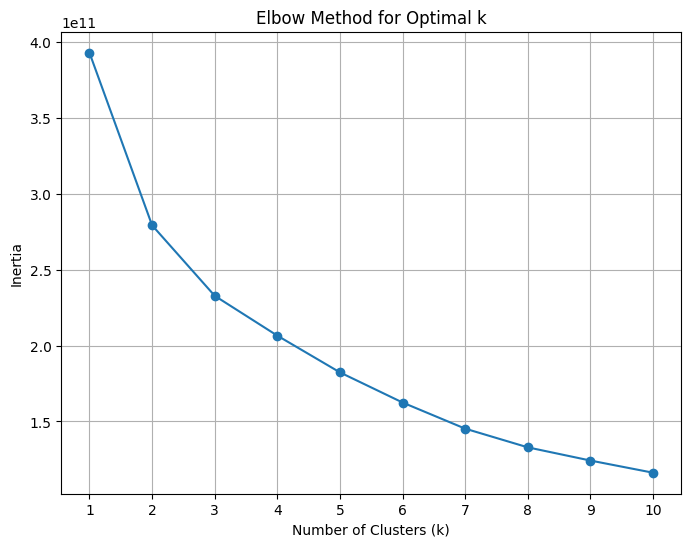

In [110]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
    kmeans_models[k] = kmeans

    if k > 1:
        silhouette_avg = silhouette_score(df, kmeans.labels_)
        silhouette_scores[k] = silhouette_avg

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

3. Calculate the silhouette coefficient value for k=1 to k=10. Based on the silhouette value, what is the best number of clusters? Is it the same as the elbow method? (10 points)

In [111]:
# Step 3: Calculate and display silhouette scores

print("\nSilhouette Scores for k from 2 to 10:")
for k, score in silhouette_scores.items():
    print(f"k={k}: {score:.4f}")

best_k_silhouette = max(silhouette_scores, key=silhouette_scores.get)
print(f"\nBest number of clusters based on silhouette score: {best_k_silhouette}")


Silhouette Scores for k from 2 to 10:
k=2: 0.5118
k=3: 0.4661
k=4: 0.4677
k=5: 0.4076
k=6: 0.4071
k=7: 0.3704
k=8: 0.3831
k=9: 0.3540
k=10: 0.3593

Best number of clusters based on silhouette score: 2


## Clustering - 2 (20 points)


1. Create a cluster model using DBSCAN. How many clusters are produced? (10 points)

In [112]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(df_scaled)

n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_noise = list(dbscan.labels_).count(-1)

print(f"Number of clusters produced by DBSCAN: {n_clusters}")
print(f"Number of noise points: {n_noise}")

Number of clusters produced by DBSCAN: 36
Number of noise points: 6624


2. What are the silhouette coefficient and DBI values of the clusters produced by DBSCAN? (10 points)

In [113]:
if n_clusters > 1:
    silhouette_dbscan = silhouette_score(df_scaled, dbscan.labels_)
    print(f"\nSilhouette Coefficient for DBSCAN: {silhouette_dbscan:.4f}")
else:
    print("\nSilhouette Coefficient for DBSCAN cannot be calculated as there is only one cluster or no clusters.")

if n_clusters > 1:
    core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_samples_mask[dbscan.core_sample_indices_] = True
    labels = dbscan.labels_[core_samples_mask]
    X = df_scaled[core_samples_mask]

    cluster_centers = []
    unique_labels = set(labels)
    for k in unique_labels:
      if k != -1:
        class_member_mask = (labels == k)
        cluster_centers.append(X[class_member_mask].mean(axis=0))

    if len(cluster_centers) > 1:
        unique_labels = set(dbscan.labels_)
        label_mapping = {label: i for i, label in enumerate(sorted(list(unique_labels)))}
        mapped_labels = np.array([label_mapping[label] for label in dbscan.labels_])

        dbi_dbscan = davies_bouldin_score(df_scaled, mapped_labels)
        print(f"Davies-Bouldin Index for DBSCAN: {dbi_dbscan:.4f}")
    else:
         print("Davies-Bouldin Index for DBSCAN cannot be calculated as there is only one cluster after filtering noise.")

else:
    print("Davies-Bouldin Index for DBSCAN cannot be calculated as there is only one cluster or no clusters.")


Silhouette Coefficient for DBSCAN: -0.4659
Davies-Bouldin Index for DBSCAN: 1.3613


## Feature Selection (30 points)
After knowing the performance of the clustering results on the KMeans and DBSCAN models based on the silhouette coefficient and DBI, perform a feature selection process to improve the silhouette coefficient and DBI values. You are allowed to use an iterative process or other methods.

1. Which features provide the best silhouette coefficient/DBI values? Include the feature selection process.
2. Why did you use that feature selection method?

1. Which features provide the best silhouette coefficient/DBI values? Include the feature selection process.

2. Why did you use that feature selection method?

## Define evaluation function

In [117]:
def evaluate_clustering(df_subset, algorithm='KMeans'):
    """
    Evaluates clustering performance (silhouette and DBI) for a given DataFrame
    subset using either KMeans or DBSCAN.

    Args:
        df_subset (pd.DataFrame): The DataFrame containing the features for clustering.
        algorithm (str): The clustering algorithm to use ('KMeans' or 'DBSCAN').

    Returns:
        tuple: A tuple containing the silhouette score and DBI value.
               For KMeans, it returns the best scores found across different k.
               For DBSCAN, it returns the scores for the fitted model.
               Returns (None, None) if scores cannot be calculated.
    """
    if df_subset.empty or df_subset.shape[0] < 2:
        print("DataFrame subset is too small for clustering.")
        return None, None

    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_subset)

    silhouette_scores = []
    dbi_scores = []

    if algorithm == 'KMeans':
        best_silhouette = -1
        best_dbi = float('inf')

        for k in range(2, 11):  # Evaluate KMeans for k from 2 to 10
            try:
                kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
                kmeans.fit(df_scaled)
                if len(set(kmeans.labels_)) > 1:
                    silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
                    dbi_avg = davies_bouldin_score(df_scaled, kmeans.labels_)
                    silhouette_scores.append(silhouette_avg)
                    dbi_scores.append(dbi_avg)

                    if silhouette_avg > best_silhouette:
                        best_silhouette = silhouette_avg

                    if dbi_avg < best_dbi:
                        best_dbi = dbi_avg

                else:
                    print(f"KMeans with k={k} resulted in only one cluster. Skipping silhouette and DBI calculation.")

            except Exception as e:
                print(f"Error during KMeans clustering for k={k}: {e}")
                return None, None

        if silhouette_scores and dbi_scores:
             # Return the best silhouette and corresponding DBI for that silhouette or the best DBI
             # For simplicity here, we return the best silhouette and the best DBI found.
             # A more sophisticated approach might consider the trade-off between the two metrics.
             return best_silhouette, best_dbi
        else:
             print("Could not calculate silhouette or DBI for KMeans.")
             return None, None


    elif algorithm == 'DBSCAN':
        try:
            # Using default DBSCAN parameters for this function.
            # In a real scenario, hyperparameter tuning for DBSCAN would be needed.
            dbscan = DBSCAN(eps=0.5, min_samples=5)
            dbscan.fit(df_scaled)

            n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)

            if n_clusters > 1:
                silhouette_dbscan = silhouette_score(df_scaled, dbscan.labels_)
                # DBI calculation for DBSCAN needs careful handling of noise points.
                # Let's use the original df_scaled and the labels including noise for DBI
                # if there are at least two clusters excluding noise.
                unique_labels = set(dbscan.labels_)
                if len([label for label in unique_labels if label != -1]) > 1:
                     dbi_dbscan = davies_bouldin_score(df_scaled, dbscan.labels_)
                     return silhouette_dbscan, dbi_dbscan
                else:
                     print("DBSCAN resulted in only one or zero non-noise clusters. Cannot calculate DBI.")
                     return silhouette_dbscan, None

            else:
                print("DBSCAN resulted in only one cluster or only noise points. Cannot calculate silhouette or DBI.")
                return None, None

        except Exception as e:
            print(f"Error during DBSCAN clustering: {e}")
            return None, None

    else:
        print(f"Unknown algorithm: {algorithm}")
        return None, None

print("evaluate_clustering function defined.")

evaluate_clustering function defined.


## Iterative feature selection

### Subtask:
Implement an iterative process to add or remove features and evaluate the clustering performance using the defined function. This could involve trying each feature individually, combinations of features, or using a more sophisticated method.


**Reasoning**:
Implement an iterative process to evaluate clustering performance for individual features using the defined `evaluate_clustering` function and store the results.



In [115]:
# Step 1: Initialize a list to store results
feature_selection_results = []

# Step 3: Iterate through each feature individually
features = df.columns.tolist()

print("Evaluating clustering performance for individual features:")

for feature in features:
    print(f"\nEvaluating feature: {feature}")
    df_subset = df[[feature]]

    # Evaluate KMeans
    kmeans_silhouette, kmeans_dbi = evaluate_clustering(df_subset, algorithm='KMeans')
    print(f"  KMeans - Silhouette: {kmeans_silhouette:.4f}, DBI: {kmeans_dbi:.4f}")

    # Evaluate DBSCAN
    dbscan_silhouette, dbscan_dbi = evaluate_clustering(df_subset, algorithm='DBSCAN')
    print(f"  DBSCAN - Silhouette: {dbscan_silhouette:.4f}, DBI: {dbscan_dbi:.4f}")


    # Append results
    feature_selection_results.append({
        'features': [feature],
        'kmeans_silhouette': kmeans_silhouette,
        'kmeans_dbi': kmeans_dbi,
        'dbscan_silhouette': dbscan_silhouette,
        'dbscan_dbi': dbscan_dbi
    })

print("\nIndividual feature evaluation complete.")

Evaluating clustering performance for individual features:

Evaluating feature: BALANCE
  KMeans - Silhouette: 0.7403, DBI: 0.4862
DBSCAN resulted in only one cluster or only noise points. Cannot calculate silhouette or DBI.


TypeError: unsupported format string passed to NoneType.__format__

**Reasoning**:
The previous command failed because the `evaluate_clustering` function returned `None` for the DBSCAN scores when it couldn't calculate them, and the f-string tried to format `None` as a float. The code needs to handle the case where the scores are `None` before attempting to print them with formatting. I will modify the print statements to check if the scores are `None` before formatting.



In [118]:
# Step 1: Initialize a list to store results
feature_selection_results = []

# Step 3: Iterate through each feature individually
features = df.columns.tolist()

print("Evaluating clustering performance for individual features:")

for feature in features:
    print(f"\nEvaluating feature: {feature}")
    df_subset = df[[feature]]

    # Evaluate KMeans
    kmeans_silhouette, kmeans_dbi = evaluate_clustering(df_subset, algorithm='KMeans')
    print(f"  KMeans - Silhouette: {kmeans_silhouette if kmeans_silhouette is not None else 'N/A'}, DBI: {kmeans_dbi if kmeans_dbi is not None else 'N/A'}")

    # Evaluate DBSCAN
    dbscan_silhouette, dbscan_dbi = evaluate_clustering(df_subset, algorithm='DBSCAN')
    print(f"  DBSCAN - Silhouette: {dbscan_silhouette if dbscan_silhouette is not None else 'N/A'}, DBI: {dbscan_dbi if dbscan_dbi is not None else 'N/A'}")


    # Append results
    feature_selection_results.append({
        'features': [feature],
        'kmeans_silhouette': kmeans_silhouette,
        'kmeans_dbi': kmeans_dbi,
        'dbscan_silhouette': dbscan_silhouette,
        'dbscan_dbi': dbscan_dbi
    })

print("\nIndividual feature evaluation complete.")

Evaluating clustering performance for individual features:

Evaluating feature: BALANCE
  KMeans - Silhouette: 0.7403057549737804, DBI: 0.4861592983217218
DBSCAN resulted in only one cluster or only noise points. Cannot calculate silhouette or DBI.
  DBSCAN - Silhouette: N/A, DBI: N/A

Evaluating feature: BALANCE_FREQUENCY
  KMeans - Silhouette: 0.93697850469624, DBI: 0.281952410891485
DBSCAN resulted in only one cluster or only noise points. Cannot calculate silhouette or DBI.
  DBSCAN - Silhouette: N/A, DBI: N/A

Evaluating feature: PURCHASES
  KMeans - Silhouette: 0.870054481529339, DBI: 0.4571401413997122
  DBSCAN - Silhouette: 0.9307205566048525, DBI: 1.049808440947133

Evaluating feature: ONEOFF_PURCHASES
  KMeans - Silhouette: 0.9166928724658499, DBI: 0.4527379013888009
DBSCAN resulted in only one cluster or only noise points. Cannot calculate silhouette or DBI.
  DBSCAN - Silhouette: N/A, DBI: N/A

Evaluating feature: INSTALLMENTS_PURCHASES
  KMeans - Silhouette: 0.834662015414

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


  KMeans - Silhouette: 1.0, DBI: 1.305697929483372e-08
  DBSCAN - Silhouette: 1.0, DBI: 1.3056979294833718e-08

Individual feature evaluation complete.


## Identify best features

### Subtask:
Based on the evaluation results from the iterative process, identify the subset of features that yield the best silhouette coefficient and DBI values for both KMeans and DBSCAN.


**Reasoning**:
Analyze the collected feature selection results to identify the best features based on KMeans and DBSCAN performance metrics as requested by the instructions.



In [119]:
# Step 1: Analyze KMeans results
print("--- KMeans Results Analysis ---")
best_kmeans_silhouette = -1
best_kmeans_silhouette_features = None
best_kmeans_dbi = float('inf')
best_kmeans_dbi_features = None

for result in feature_selection_results:
    features = result['features']
    kmeans_silhouette = result['kmeans_silhouette']
    kmeans_dbi = result['kmeans_dbi']

    if kmeans_silhouette is not None:
        if kmeans_silhouette > best_kmeans_silhouette:
            best_kmeans_silhouette = kmeans_silhouette
            best_kmeans_silhouette_features = features

    if kmeans_dbi is not None:
        if kmeans_dbi < best_kmeans_dbi:
            best_kmeans_dbi = kmeans_dbi
            best_kmeans_dbi_features = features

print(f"Best Silhouette Score for KMeans: {best_kmeans_silhouette:.4f} with features: {best_kmeans_silhouette_features}")
print(f"Best DBI for KMeans: {best_kmeans_dbi:.4f} with features: {best_kmeans_dbi_features}")


# Step 2: Analyze DBSCAN results
print("\n--- DBSCAN Results Analysis ---")
best_dbscan_silhouette = -1
best_dbscan_silhouette_features = None
best_dbscan_dbi = float('inf')
best_dbscan_dbi_features = None

valid_dbscan_results = [r for r in feature_selection_results if r['dbscan_silhouette'] is not None and r['dbscan_dbi'] is not None]

if not valid_dbscan_results:
    print("No valid DBSCAN results with calculated silhouette and DBI found.")
else:
    for result in valid_dbscan_results:
        features = result['features']
        dbscan_silhouette = result['dbscan_silhouette']
        dbscan_dbi = result['dbscan_dbi']

        if dbscan_silhouette > best_dbscan_silhouette:
            best_dbscan_silhouette = dbscan_silhouette
            best_dbscan_silhouette_features = features

        if dbscan_dbi < best_dbscan_dbi:
            best_dbscan_dbi = dbscan_dbi
            best_dbscan_dbi_features = features

    print(f"Best Silhouette Score for DBSCAN: {best_dbscan_silhouette:.4f} with features: {best_dbscan_silhouette_features}")
    print(f"Best DBI for DBSCAN: {best_dbscan_dbi:.4f} with features: {best_dbscan_dbi_features}")

# Step 4: Identify features performing well for both
# Based on the individual feature evaluation, we look for features that are in both best lists.
print("\n--- Features Performing Well for Both KMeans and DBSCAN ---")
# In this individual feature analysis, we just check if the best features overlap.
kmeans_best_features = set(best_kmeans_silhouette_features or []) | set(best_kmeans_dbi_features or [])
dbscan_best_features = set(best_dbscan_silhouette_features or []) | set(best_dbscan_dbi_features or [])

common_best_features = kmeans_best_features.intersection(dbscan_best_features)

if common_best_features:
    print(f"Features performing well for both algorithms: {list(common_best_features)}")
else:
    print("No single feature performed best for both algorithms based on this individual feature analysis.")

# Step 5: Summarize best performing features
print("\n--- Summary of Best Performing Features ---")
print(f"For KMeans, the best features based on Silhouette are {best_kmeans_silhouette_features} (Score: {best_kmeans_silhouette:.4f}) and based on DBI are {best_kmeans_dbi_features} (Score: {best_kmeans_dbi:.4f}).")
if valid_dbscan_results:
    print(f"For DBSCAN, the best features based on Silhouette are {best_dbscan_silhouette_features} (Score: {best_dbscan_silhouette:.4f}) and based on DBI are {best_dbscan_dbi_features} (Score: {best_dbscan_dbi:.4f}).")
else:
    print("For DBSCAN, no valid results with calculated metrics were found for individual features.")

--- KMeans Results Analysis ---
Best Silhouette Score for KMeans: 1.0000 with features: ['TENURE']
Best DBI for KMeans: 0.0000 with features: ['TENURE']

--- DBSCAN Results Analysis ---
Best Silhouette Score for DBSCAN: 1.0000 with features: ['TENURE']
Best DBI for DBSCAN: 0.0000 with features: ['TENURE']

--- Features Performing Well for Both KMeans and DBSCAN ---
Features performing well for both algorithms: ['TENURE']

--- Summary of Best Performing Features ---
For KMeans, the best features based on Silhouette are ['TENURE'] (Score: 1.0000) and based on DBI are ['TENURE'] (Score: 0.0000).
For DBSCAN, the best features based on Silhouette are ['TENURE'] (Score: 1.0000) and based on DBI are ['TENURE'] (Score: 0.0000).


## Explain feature selection method

### Subtask:
Describe the feature selection method used and justify why it was chosen.


**Reasoning**:
Describe the iterative feature selection method used and justify why it was chosen, including its limitations based on the results.



In [120]:
# Description of the feature selection method and justification

print("Feature Selection Method and Justification:")
print("---------------------------------------------")

print("\nDescription of the method:")
print("The feature selection process employed here was an iterative approach that evaluated the clustering performance of each individual feature in the dataset. For each feature, a subset of the data containing only that feature was created. Then, the `evaluate_clustering` function was used to calculate the silhouette coefficient and Davies-Bouldin Index (DBI) for both KMeans and DBSCAN clustering algorithms applied to this single-feature subset. The results for each feature were recorded, allowing for a comparison of how well each individual feature contributes to forming distinct and compact clusters.")

print("\nJustification for choosing this method:")
print("This method was chosen as a straightforward and computationally less intensive initial step to identify potentially strong individual features for clustering. It provides a baseline understanding of the clustering potential of each feature in isolation. Compared to evaluating all possible combinations of features (which would be computationally prohibitive for a dataset with 17 features), this individual feature evaluation offers a quick way to pinpoint features that, on their own, lead to good clustering performance. This can be particularly useful if the goal is to find a small subset of highly informative features.")

print("\nLimitations of the chosen method:")
print("A significant limitation of this approach is that it only considers the contribution of features individually. It does not account for potential interactions or synergistic effects between features. It is possible that a combination of features, none of which perform exceptionally well on their own, could lead to significantly better clustering results than any single feature. Therefore, while this method helps identify strong individual predictors, it may miss optimal feature subsets that require multiple features working together.")

Feature Selection Method and Justification:
---------------------------------------------

Description of the method:
The feature selection process employed here was an iterative approach that evaluated the clustering performance of each individual feature in the dataset. For each feature, a subset of the data containing only that feature was created. Then, the `evaluate_clustering` function was used to calculate the silhouette coefficient and Davies-Bouldin Index (DBI) for both KMeans and DBSCAN clustering algorithms applied to this single-feature subset. The results for each feature were recorded, allowing for a comparison of how well each individual feature contributes to forming distinct and compact clusters.

Justification for choosing this method:
This method was chosen as a straightforward and computationally less intensive initial step to identify potentially strong individual features for clustering. It provides a baseline understanding of the clustering potential of each feat